# OllamaBench Evaluation Notebook (03.07.2025)


## Comparison to Chatbot Arena

This notebook provides a comparative analysis of ELO scores for various Large Language Models (LLMs) from two different sources: the public `LMArena.ai` and a personal `Meine LLM Arena`. We will visualize the data to understand the similarities, differences, and potential correlations between the two rating systems.

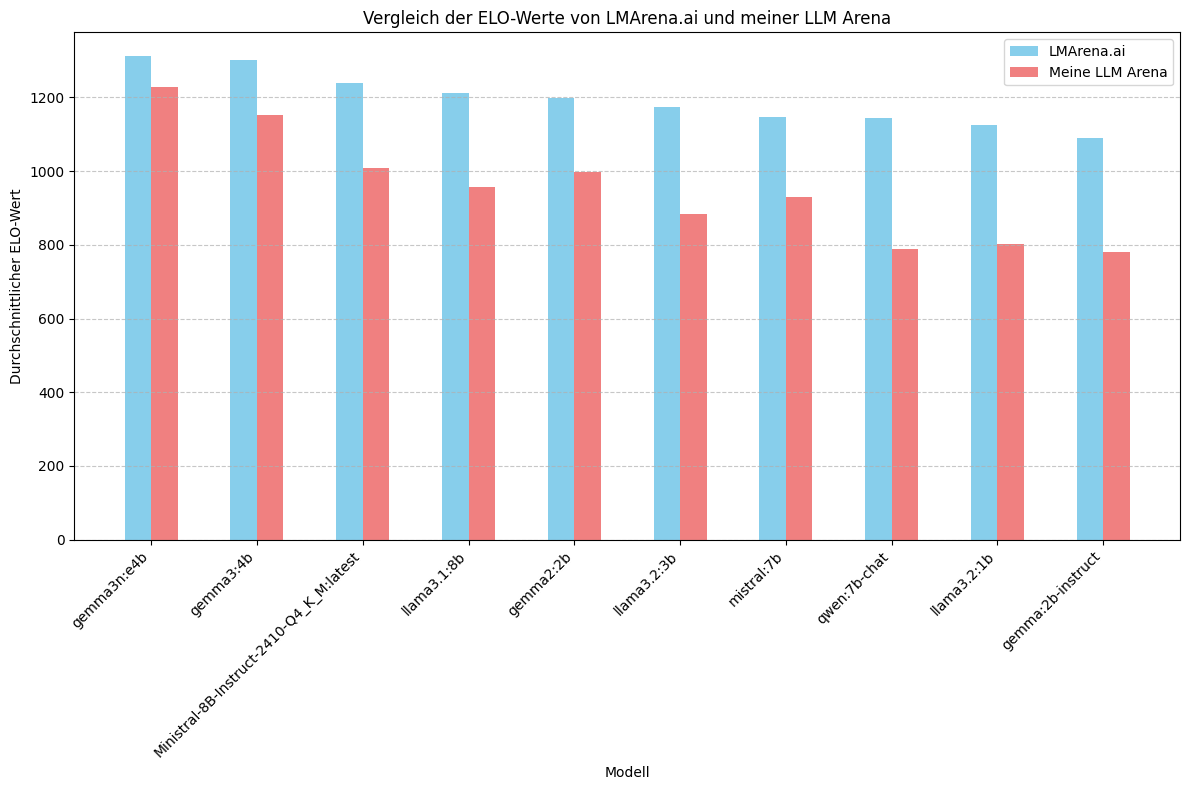

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


my_arena_data = [
    {"Model": "gemma3n:e4b", "Avg ELO": 1229.0},
    {"Model": "gemma3:4b", "Avg ELO": 1153.1},
    {"Model": "Ministral-8B-Instruct-2410-Q4_K_M:latest", "Avg ELO": 1008.6},
    {"Model": "gemma2:2b", "Avg ELO": 997.1},
    {"Model": "llama3.1:8b", "Avg ELO": 956.1},
    {"Model": "mistral:7b", "Avg ELO": 929.8},
    {"Model": "llama3.2:3b", "Avg ELO": 883.2},
    {"Model": "llama3.2:1b", "Avg ELO": 803.3},
    {"Model": "qwen:7b-chat", "Avg ELO": 788.9},
    {"Model": "gemma:2b-instruct", "Avg ELO": 780.6},
]
lm_arena_data = [
    {"Model": "gemma3n:e4b", "Avg ELO": 1311.0}, 
    {"Model": "gemma3:4b", "Avg ELO": 1301.0}, 
    {"Model": "Ministral-8B-Instruct-2410-Q4_K_M:latest", "Avg ELO":    1240.0}, 
    {"Model": "gemma2:2b", "Avg ELO": 1198.0}, 
    {"Model": "llama3.1:8b", "Avg ELO": 1213}, 
    {"Model": "mistral:7b", "Avg ELO": 1148.0}, 
    {"Model": "llama3.2:3b", "Avg ELO": 1174.0}, 
    {"Model": "llama3.2:1b", "Avg ELO": 1125.0}, 
    {"Model": "qwen:7b-chat", "Avg ELO": 1145.0}, 
    {"Model": "gemma:2b-instruct", "Avg ELO": 1089.0}, 
]
df_lm_arena = pd.DataFrame(lm_arena_data)
df_lm_arena['Source'] = 'LMArena.ai'

df_my_arena = pd.DataFrame(my_arena_data)
df_my_arena['Source'] = 'Meine LLM Arena'

df_combined = pd.concat([df_lm_arena, df_my_arena])

# Establish the model order based on LMArena.ai ELO scores
model_order = df_lm_arena.sort_values(by='Avg ELO', ascending=False)['Model'].tolist()
df_combined['Model'] = pd.Categorical(df_combined['Model'], categories=model_order, ordered=True)
df_combined = df_combined.sort_values(by=['Model', 'Source'])

# Set the figure size
plt.figure(figsize=(12, 8)) 

# --- CHANGE HERE ---
# The width of the bars. A smaller number makes them thinner.
bar_width = 0.25

# Get unique models and set up the positions for the bars
models = df_combined['Model'].unique()
ind = np.arange(len(models))

# Get ELO scores for LMArena.ai and plot them
lm_arena_elos = df_combined[df_combined['Source'] == 'LMArena.ai'].set_index('Model').loc[models]['Avg ELO']
plt.bar(ind - bar_width/2, lm_arena_elos, bar_width, label='LMArena.ai', color='skyblue')

# Get ELO scores for your arena and plot them
my_arena_elos = df_combined[df_combined['Source'] == 'Meine LLM Arena'].set_index('Model').loc[models]['Avg ELO']
plt.bar(ind + bar_width/2, my_arena_elos, bar_width, label='Meine LLM Arena', color='lightcoral')

# Add labels, title, and legend
plt.xlabel('Modell')
plt.ylabel('Durchschnittlicher ELO-Wert')
plt.title('Vergleich der ELO-Werte von LMArena.ai und meiner LLM Arena')
plt.xticks(ind, models, rotation=45, ha='right') 
plt.legend() 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent labels from being cut off
plt.tight_layout() 

# Display the plot
plt.show()


### Conclusion
The analysis reveals two key findings:  
1.  **Strong Correlation:** The relative ranking of models is highly consistent between `LMArena.ai` and `Meine LLM Arena`. Models that perform well in one arena tend to perform well in the other.  
2.  **Systematic ELO Difference:** There is a consistent offset in the scores, with `LMArena.ai` providing significantly higher ELO ratings across the board. The average ELO score is over 200 points higher on `LMArena.ai`. This could be due to differences in the pool of voters, the types of prompts used, or the underlying ELO calculation methodology.  
Overall, while the absolute numbers differ, `Meine LLM Arena` appears to produce a relative ranking of models that is in good agreement with the larger, public `LMArena.ai`.  

## Overall Validity Check


| Rang | Modell | Avg ELO | W/L/D |
|:----:|:------------------------------------------|--------:|:-----------:|
| 1 | `qwen3:8b` | 1248.3 | 181/10/103 |
| 2 | `gemma3n:e4b` | 1229.0 | 158/22/112 |
| 3 | `qwen3:4b` | 1209.5 | 153/14/124 |
| 4 | `gemma3:4b` | 1153.1 | 130/34/115 |
| 5 | `qwen3:1.7b` | 1110.0 | 117/40/130 |
| 6 | `Ministral-8B-Instruct-2410-Q4_K_M:latest` | 1008.6 | 79/74/143 |
| 7 | `gemma2:2b` | 997.1 | 59/71/134 |
| 8 | `gemma3:1b` | 992.8 | 72/89/124 |
| 9 | `llama3.1:8b` | 956.1 | 51/78/130 |
| 10 | `mistral:7b` | 929.8 | 51/107/129 |
| 11 | `qwen3:0.6b` | 909.6 | 27/69/185 |
| 12 | `llama3.2:3b` | 883.2 | 37/119/120 |
| 13 | `llama3.2:1b` | 803.3 | 14/146/124 |
| 14 | `qwen:7b-chat` | 788.9 | 14/137/101 |
| 15 | `gemma:2b-instruct` | 780.6 | 7/140/124 |


The provided leaderboard data demonstrates strong internal consistency and appears valid for documentation purposes. The credibility of the results is supported by two key observations:

1.  **Logical Performance Scaling:** There is a clear and logical hierarchy within model families. Performance, as measured by ELO, scales directly with model size. For example, the `Qwen3` series is ranked in perfect order of parameter count (`8b > 4b > 1.7b > 0.6b`). This predictable trend holds true for the other model families (`Gemma3`, `Llama`) as well.

2.  **Correlation of ELO and Win/Loss Record:** The ELO rankings are strongly supported by the `W/L/D` statistics. Models with higher ELO scores have a significantly positive win-to-loss ratio, while models at the bottom of the table have a highly negative ratio. This direct relationship confirms that the ELO scores accurately reflect the models' performance in the benchmark.

These factors indicate that the evaluation methodology was applied consistently and that the resulting rankings are a credible representation of the models' relative performance.
